In [2]:


#Imports
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection  import train_test_split

import seaborn as sns
#Analyse

In [3]:
#import du dataset
#data_logement = pd.read_csv("https://drive.google.com/open?id=1b0iVq0xiM-H9pp-isfgEirJUPbaizoc5",sep=';') 

#data_etudiant = pd.read_csv("https://drive.google.com/file/d/1a6ixl8lcFDkB0ZLv_dlZ0w_Fy5THokz9/view?usp=sharing",sep=';') 
#data_logement.info()
#data_etudiant.info()





#url="https://docs.google.com/spreadsheets/d/1knn9iwSM7ho_1DvNx-kI_Xc2rR6F0G1fHdH0Zg4C7qk/edit#gid=954277089"
#s=requests.get(url).content
#io.StringIO(s.decode('utf-8'))

data_etudiant=pd.read_csv("data\dataSet_NbrEtudiant_sexe.csv", sep=';')
data_etudiant["Nombre Etudiant Total"]=data_etudiant["Nombre Etudiant Femme"]+data_etudiant["Nombre Etudiant Male"]
data_etudiant





,rentrée,Nombre Etudiant Femme,Nombre Etudiant Male,Nombre Etudiant Total
0,2001,235604.0,189282.0,424886.0
1,2002,243258.0,193056.0,436314.0
2,2003,253350.0,198248.0,451598.0
3,2004,254930.0,198848.0,453778.0
4,2005,251174.0,197498.0,448672.0
5,2006,243340.0,192589.0,435929.0
6,2007,241098.0,190700.0,431798.0
7,2008,237630.0,188236.0,425866.0
8,2009,242831.0,193006.0,435837.0
9,2010,251084.0,198830.0,449914.0


In [4]:
data_etudiant_from_2010=data_etudiant[data_etudiant["rentrée"]>2009]
data_etudiant_from_2010

,rentrée,Nombre Etudiant Femme,Nombre Etudiant Male,Nombre Etudiant Total
9,2010,251084.0,198830.0,449914.0
10,2011,260606.0,207160.0,467766.0
11,2012,265782.0,211202.0,476984.0
12,2013,269678.0,216577.0,486255.0
13,2014,273255.0,221714.0,494969.0
14,2015,281565.0,227933.0,509498.0
15,2016,286039.0,233861.0,519900.0


In [5]:
data_logement=pd.read_csv("data\\NumberConstructionPerYear.csv", sep=';')
data_logement

,year,NumberConstructionPeerYear
0,2013,11
1,2014,104
2,2015,88
3,2016,86
4,2017,96
5,2018,60


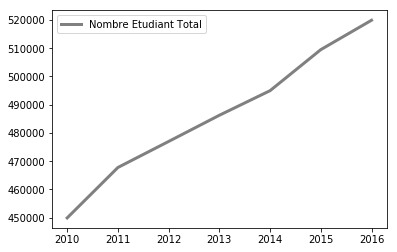

In [6]:
#plt.plot(data_etudiant['rentrée'], data_etudiant['Nombre Etudiant Femme'], color='red', linewidth=3)
#plt.plot(data_etudiant['rentrée'], data_etudiant['Nombre Etudiant Male'], color='blue', linewidth=3)
plt.plot(data_etudiant_from_2010['rentrée'], data_etudiant_from_2010['Nombre Etudiant Total'], color='grey', linewidth=3)
plt.legend()


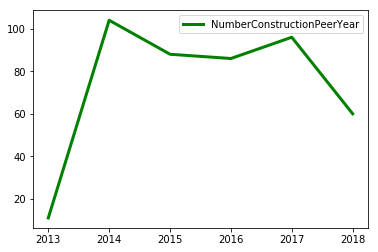

In [7]:
plt.plot(data_logement['year'], data_logement['NumberConstructionPeerYear'], color='green', linewidth=3)
plt.legend()

In [8]:
data_etudiant

,rentrée,Nombre Etudiant Femme,Nombre Etudiant Male,Nombre Etudiant Total
0,2001,235604.0,189282.0,424886.0
1,2002,243258.0,193056.0,436314.0
2,2003,253350.0,198248.0,451598.0
3,2004,254930.0,198848.0,453778.0
4,2005,251174.0,197498.0,448672.0
5,2006,243340.0,192589.0,435929.0
6,2007,241098.0,190700.0,431798.0
7,2008,237630.0,188236.0,425866.0
8,2009,242831.0,193006.0,435837.0
9,2010,251084.0,198830.0,449914.0


In [9]:
indexed_data_etudiant=data_etudiant

indexed_data_etudiant['rentrée']=indexed_data_etudiant["rentrée"].astype(str)
indexed_data_etudiant=indexed_data_etudiant.set_index('rentrée')
indexed_data_etudiant.info()
indexed_data_etudiant.index


<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2001 to 2016
Data columns (total 3 columns):
Nombre Etudiant Femme    16 non-null float64
Nombre Etudiant Male     16 non-null float64
Nombre Etudiant Total    16 non-null float64
dtypes: float64(3)
memory usage: 448.0+ bytes


Index(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object', name='rentrée')

In [10]:
#fig = plt.figure()
#ax = fig.gca()


#ax.bar(data_etudiant_from_2010['rentrée'],data_etudiant_from_2010['Nombre Etudiant Total'])
#ax.plot(data_logement['year'], data_logement['NumberConstructionPeerYear'])

#plt.legend()
#plt.show()
#x = data_etudiant["rentrée"]
#y = data_etudiant["Nombre Etudiant Total"]


#model
#model = linear_model.LinearRegression()
#model.fit(x,y)

#indexed_data_etudiant=indexed_data_etudiant.set_index('rentrée')

#indexed_data_etudiant_from_2010.loc[2010:2012,:]


In [11]:
df_x=indexed_data_etudiant
#df_y=indexed_data_etudiant["Nombre Etudiant Total"]
df_y=pd.concat((data_etudiant["rentrée"],data_etudiant["Nombre Etudiant Total"]),axis=1,keys=["rentrée","Nombre Etudiant Total"])
df_y['rentrée']=df_y["rentrée"].astype(str)
df_y=df_y.set_index('rentrée')
df_y

,Nombre Etudiant Total
rentrée,
2001,424886.0
2002,436314.0
2003,451598.0
2004,453778.0
2005,448672.0
2006,435929.0
2007,431798.0
2008,425866.0
2009,435837.0


In [12]:


model = linear_model.LinearRegression()
#x_train=df_x[:2012]
#x_test=df_x[2013:2016]
#y_train=df_y[:2012]
#y_test=df_y[2013:2016]

x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.33)
model.fit(x_train,y_train)


model.coef_


array([[0.33333333, 0.33333333, 0.66666667]])

In [13]:
model.intercept_

array([-5.82076609e-11])

In [14]:
y_pred=model.predict(x_test)
y_pred

array([[424886.],
       [435929.],
       [494969.],
       [467766.],
       [509498.],
       [449914.]])

In [15]:

y_test

,Nombre Etudiant Total
rentrée,
2001,424886.0
2006,435929.0
2014,494969.0
2011,467766.0
2015,509498.0
2010,449914.0


In [16]:
df_x.loc[:,"Nombre Etudiant Total"]

rentrée
2001    424886.0
2002    436314.0
2003    451598.0
2004    453778.0
2005    448672.0
2006    435929.0
2007    431798.0
2008    425866.0
2009    435837.0
2010    449914.0
2011    467766.0
2012    476984.0
2013    486255.0
2014    494969.0
2015    509498.0
2016    519900.0
Name: Nombre Etudiant Total, dtype: float64

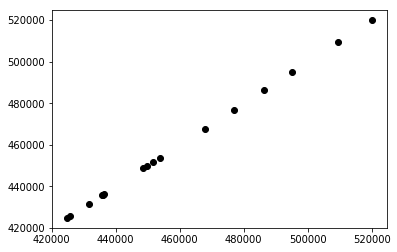

In [17]:
#plt.scatter(data_etudiant["rentrée"],data_etudiant["Nombre Etudiant Total"], color='black') 
plt.scatter(df_x.loc[:,"Nombre Etudiant Total"],df_x["Nombre Etudiant Total"], color='black')

plt.show()

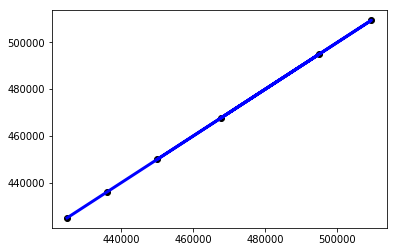

In [18]:
plt.scatter(x_test["Nombre Etudiant Total"], y_test,  color='black')
plt.plot(x_test["Nombre Etudiant Total"], y_pred, color='blue', linewidth=3)


plt.show()

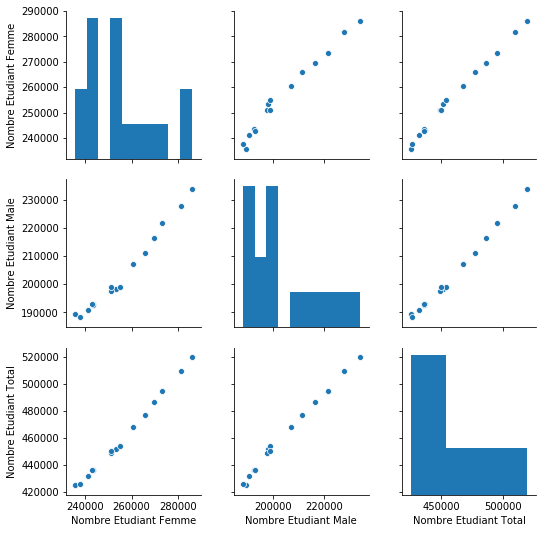

In [19]:
sns.pairplot(indexed_data_etudiant);

TypeError: can't multiply sequence by non-int of type 'float'

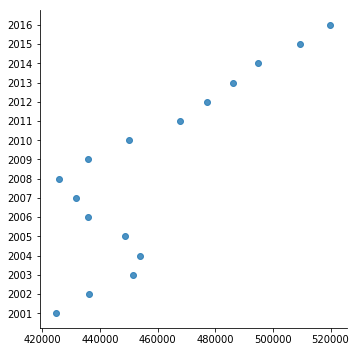

In [20]:
sns.lmplot(x="Nombre Etudiant Total", y="rentrée", data=data_etudiant);

In [21]:
data_etudiant["Nombre Etudiant Total"]

0     424886.0
1     436314.0
2     451598.0
3     453778.0
4     448672.0
5     435929.0
6     431798.0
7     425866.0
8     435837.0
9     449914.0
10    467766.0
11    476984.0
12    486255.0
13    494969.0
14    509498.0
15    519900.0
Name: Nombre Etudiant Total, dtype: float64

In [22]:
x=data_etudiant[["rentrée"]]
y=data_etudiant["Nombre Etudiant Total"]
model = linear_model.LinearRegression()
x_train=x[0:11]
x_test=x[12:16]
y_train=y[0:11]
y_test=y[12:16]

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
model.fit(x_train,y_train)


print(model.intercept_, model.coef_)


-2271884.8545454545 [1352.9]


In [23]:
y_pred=model.predict(x)
y_pred

array([435268.04545455, 436620.94545455, 437973.84545455, 439326.74545455,
       440679.64545455, 442032.54545455, 443385.44545455, 444738.34545455,
       446091.24545455, 447444.14545455, 448797.04545455, 450149.94545455,
       451502.84545455, 452855.74545455, 454208.64545455, 455561.54545455])

In [24]:
y_test

12    486255.0
13    494969.0
14    509498.0
15    519900.0
Name: Nombre Etudiant Total, dtype: float64

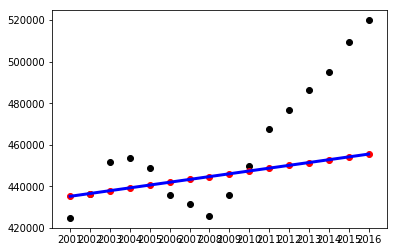

In [25]:
plt.scatter(x["rentrée"], y,  color='black')
plt.scatter(x["rentrée"], y_pred,  color='red')
plt.plot(x["rentrée"], y_pred, color='blue', linewidth=3)

plt.rcParams['figure.figsize'] = [25, 5]

plt.show()

In [26]:
data_logement[["NumberConstructionPeerYear"]]

,NumberConstructionPeerYear
0,11
1,104
2,88
3,86
4,96
5,60


In [27]:

x=data_logement[["NumberConstructionPeerYear"]]
y=data_etudiant_from_2010[["Nombre Etudiant Total"]]
#y=data_etudiant["Nombre Etudiant Total"]
model = linear_model.LinearRegression()
x_train=x[0:3]
x_test=x[4:6]
y_train=y[1:4]
y_test=y[5:7]


#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
model.fit(x_train,y_train)


print(model.intercept_, model.coef_)

[467273.65504921] [[143.76371848]]


In [28]:
y_pred=model.predict(x_test)
y_pred

array([[481074.97202373],
       [475899.47815829]])

In [29]:
x_test

,NumberConstructionPeerYear
4,96
5,60


In [30]:
plt.scatter(x["rentrée"], y,  color='black')
plt.scatter(x["rentrée"], y_pred,  color='red')
plt.plot(x["rentrée"], y_pred, color='blue', linewidth=3)

plt.rcParams['figure.figsize'] = [25, 5]

plt.show()

KeyError: 'rentrée'

In [44]:
dataframe=pd.concat((data_etudiant_from_2010["Nombre Etudiant Total"],data_logement["NumberConstructionPeerYear"]),axis=1,keys=["Nombre Etudiant Total","NumberConstructionPeerYear"])
dataframe["Nombre Etudiant Total"]=data_etudiant_from_2010["Nombre Etudiant Total"].reset_index(drop=True)
dataframe["NumberConstructionPeerYear"]=data_logement["NumberConstructionPeerYear"].reset_index(drop=True)
dataframe = dataframe[-np.isnan(dataframe["NumberConstructionPeerYear"])]
dataframe

,Nombre Etudiant Total,NumberConstructionPeerYear
0,449914.0,11.0
1,467766.0,104.0
2,476984.0,88.0
3,486255.0,86.0
4,494969.0,96.0
5,509498.0,60.0


In [35]:
###################################### works like a charm !
npMatrix = np.matrix(dataframe)
x , y = npMatrix[:,0], npMatrix[:,1]
model = linear_model.LinearRegression().fit(x,y)

m = model.coef_
b = model.intercept_

print("formula : y = {0}x + {1}".format(m, b))
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)




NameError: name 'dataframe' is not defined

In [141]:
predicted = model.predict(np.array(x[:,0]))
predicted

array([[53.29800313],
       [65.32199582],
       [71.53066513],
       [77.77503194],
       [83.64423832],
       [93.43006566]])

Text(0, 0.5, 'Nombre de construction')

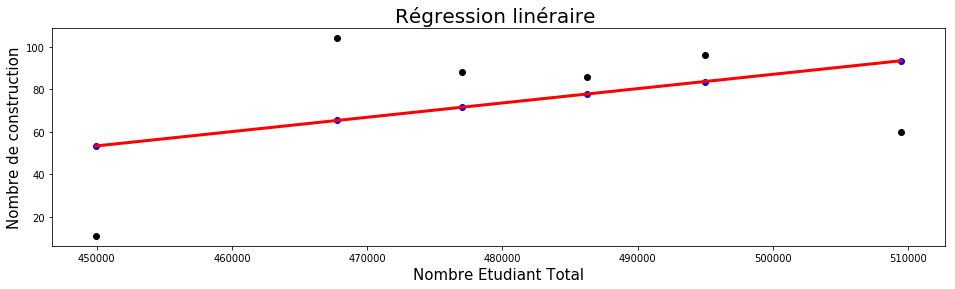

In [144]:
plt.scatter([x[:,0]],[y[:,0]],  color='black')
plt.scatter([x[:,0]],predicted,  color='blue')
#plt.plot([0,110], [b,m*110+b], 'r')
#plt.plot([x[:,0]],[b,m*110+b] , color='red', linewidth=3)
plt.plot(np.array(x[:,0]),b+m*np.array(x[:,0]) , color='red', linewidth=3)

plt.title("Régression linéraire ", fontsize=20)
plt.xlabel('Nombre Etudiant Total',fontsize=15)
plt.ylabel('Nombre de construction',fontsize=15)
#plt.rcParams['figure.figsize'] = [16, 4]

#plt.show()

In [ ]:
###########    end section     ################### works like a charm !

In [169]:
####################### polynoial regression
features = dataframe.iloc[:,1:2].values #projet

labels= dataframe.iloc[:,0:1].values #etudiant


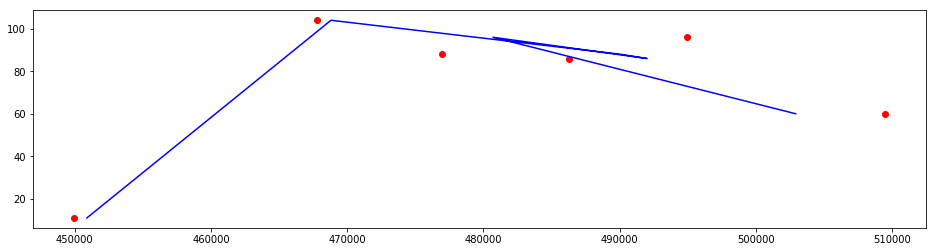

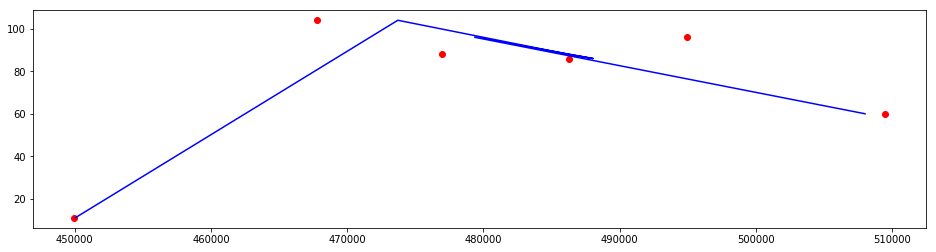

In [173]:


#plt.scatter(features,labels)
#plt.xlabel("Nbr etudiant total")
#plt.ylabel("Nbr projet immob")
#plt.show()

#x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=0)
regressor = linear_model.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

x_poly =poly_reg.fit_transform(features)


regressor.fit(x_poly,labels)
plt.scatter(labels,features,color="red")
plt.plot(regressor.predict(x_poly),features,color="blue")
plt.show()



regressor = linear_model.LinearRegression()
poly_reg = PolynomialFeatures(degree=3)

x_poly =poly_reg.fit_transform(features)


regressor.fit(x_poly,labels)
plt.scatter(labels,features,color="red")
plt.plot(regressor.predict(x_poly),features,color="blue")
plt.show()



#y_pred = regressor.predict(poly_reg.fit_transform(x_test))
#regressor.score(poly_reg.fit_transform(x_test),y_test)

formula : y = [[  0.         250.75974302]]x + [462299.65239295]


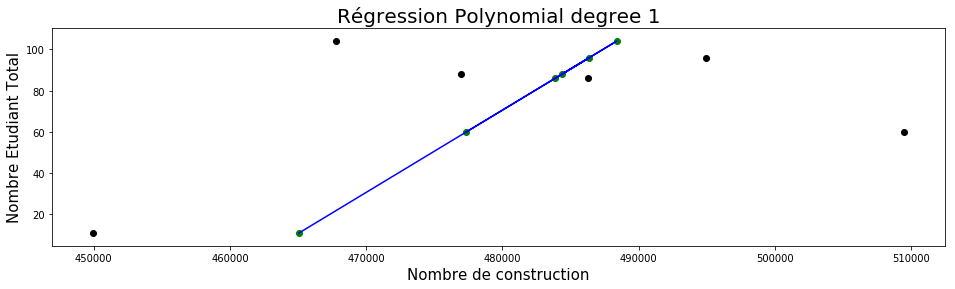

formula : y = [[   0.         2464.61839706  -19.75624596]]x + [426168.41459287]


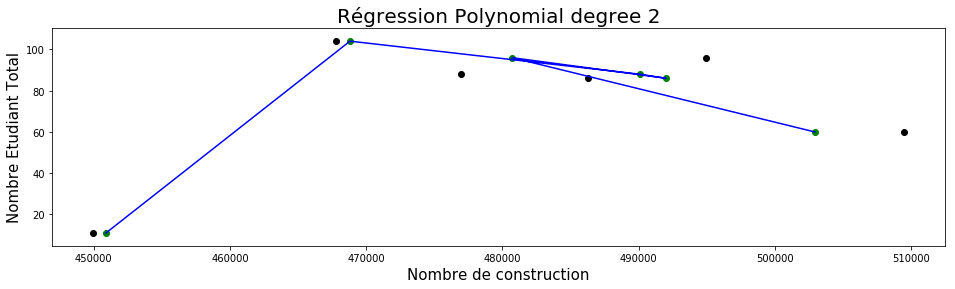

formula : y = [[ 0.00000000e+00  4.87487892e+03 -6.88127197e+01  2.72603234e-01]]x + [404361.16639528]


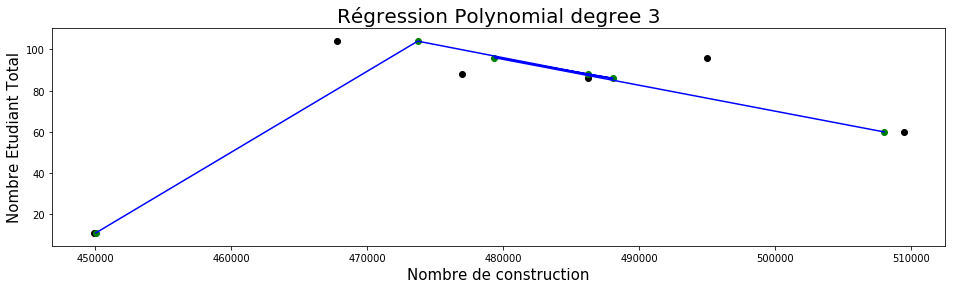

formula : y = [[ 0.00000000e+00  7.26516886e+04 -2.11194561e+03  2.31733768e+01
  -8.70907926e-02]]x + [-123279.6471615]


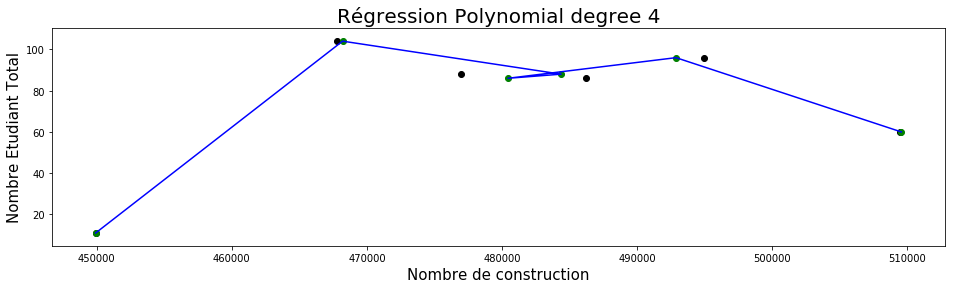

formula : y = [[ 0.00000000e+00 -1.73177023e+06  6.59149702e+04 -1.07578714e+03
   8.05281341e+00 -2.27802701e-02]]x + [12841317.91636912]


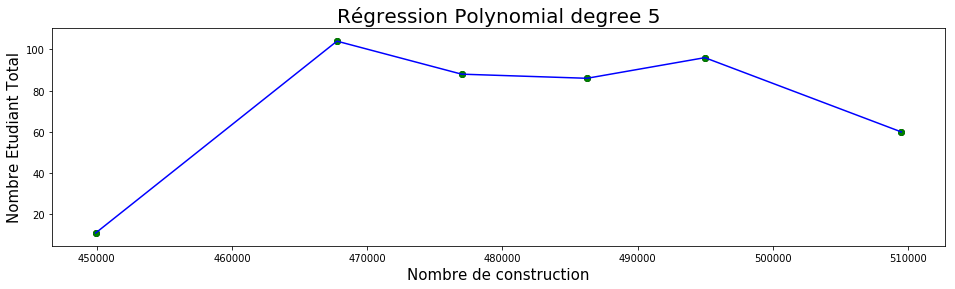

In [262]:
features = dataframe.iloc[:,1:2].values #projet

labels= dataframe.iloc[:,0:1].values #etudiant
for i in range(1,6):
    regressor = linear_model.LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(features)
    regressor.fit(x_poly,labels)
    
    mm = regressor.coef_
    bb = regressor.intercept_

    predictions = regressor.predict(x_poly)
    print("formula : y = {0}x + {1}".format(mm, bb))
    plt.scatter(labels,features,color="black")
    plt.scatter(predictions,features,color="green")
    plt.plot(predictions,features,color="blue")
    plt.title("Régression Polynomial degree {0}".format(i), fontsize=20)
    plt.xlabel('Nombre de construction',fontsize=15)
    plt.ylabel('Nombre Etudiant Total',fontsize=15)
    plt.show()
    

formule au 4 degrés : y = [[ 0.00000000e+00 -7.59665155e-08  1.06917199e-06 -2.87391049e-12
   2.16943667e-18]]x + [-43568.83685313]


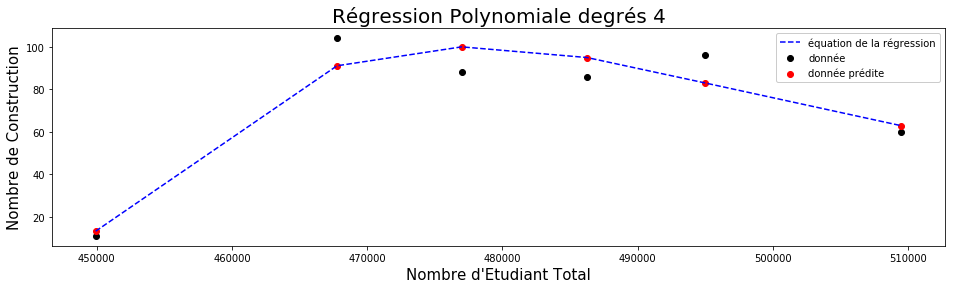

In [276]:
features = dataframe.iloc[:,0:1].values #etudiant

labels= dataframe.iloc[:,1:2].values #projet
best=-1
errB=9999999999
bestRegressor=linear_model.LinearRegression()
for i in range(1,52):
    regressor = linear_model.LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(features)
    regressor.fit(x_poly,labels)
    mm = regressor.coef_
    bb = regressor.intercept_

    predictions = regressor.predict(x_poly)
    #print("formula : y = {0}x + {1}".format(mm, bb))
    err = predictions-labels
    err = err*err
    err = np.mean(err)
    if errB > err:
        errB=err
        best=i
        bestRegressor=regressor
        

print("formule au {2} degrés : y = {0}x + {1}".format(bestRegressor.coef_, bestRegressor.intercept_,best))
poly_reg=PolynomialFeatures(degree=best)
x_poly= poly_reg.fit_transform(features)
predictions = bestRegressor.predict(x_poly)
plt.scatter(features,labels,color="black", label="donnée")
plt.scatter(features,predictions,color="red", label="donnée prédite")
plt.plot(features,predictions,'r--',color="blue",label="équation de la régression")

plt.title("Régression Polynomiale degrés {0}".format(best), fontsize=20)
plt.xlabel("Nombre d'Etudiant Total",fontsize=15)
plt.ylabel('Nombre de Construction',fontsize=15)
#plt.legend(handles=[real_data,predicted_data,regression_line], labels=["donnée","donnée prédite","équation de la régression"])
plt.legend(framealpha=1, frameon=True);
plt.show()


In [ ]:
########## end section ########## Polynomial regression

In [207]:


# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes

[ 24.78758269  72.84828707  96.76985882 104.80971695  84.82943559
  60.95511888]


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


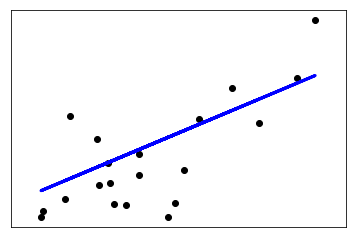

In [34]:


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()